<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
   
                                          
                                          
                                          
                                          
                                          
#                                             Random Forest Model in Predicting Obesity Risk




##                                                        Gladys Murage

##                              College of Business, Engineering, and  Technology, National University

##                                         DDS8555 v1: PREDICTIVE ANALYSIS(3602869492)

##                                                        Dr MOHAMED NABEEL

##                                                            April 15, 2025


<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>

# Key Features of This Implementation:
## Handling Categorical Variables:
1. Uses OrdinalEncoder with handle_unknown='use_encoded_value' to manage unseen categories
2. Properly encodes both training and test data

## Class Imbalance:
1. Uses class_weight='balanced' to automatically adjust for imbalanced classes
2.Better than bagging for handling minority classes

## Model Evaluation:
1. Provides accuracy and full classification report
2. Visualizes confusion matrix and feature importances

## Optimized Parameters:
1. n_estimators=200 for robust performance
2. max_depth=10 to prevent overfitting
3. min_samples_split=5 for better generalization

## Production-Ready:
1. Saves test predictions in submission format
2. Includes code for hyperparameter tuning

## Expected Performance:
This should outperform THE previous bagging model (85.72% accuracy) by:
1. Better handling of class imbalance
2. More sophisticated feature weighting
3. Typically achieves 1-3% higher accuracy than bagging in similar scenario

Matplotlib is building the font cache; this may take a moment.


Validation Accuracy: 0.8931

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       524
           1       0.85      0.84      0.85       626
           2       0.90      0.86      0.88       543
           3       0.97      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.77      0.76      0.76       484
           6       0.77      0.81      0.79       514

    accuracy                           0.89      4152
   macro avg       0.88      0.88      0.88      4152
weighted avg       0.89      0.89      0.89      4152



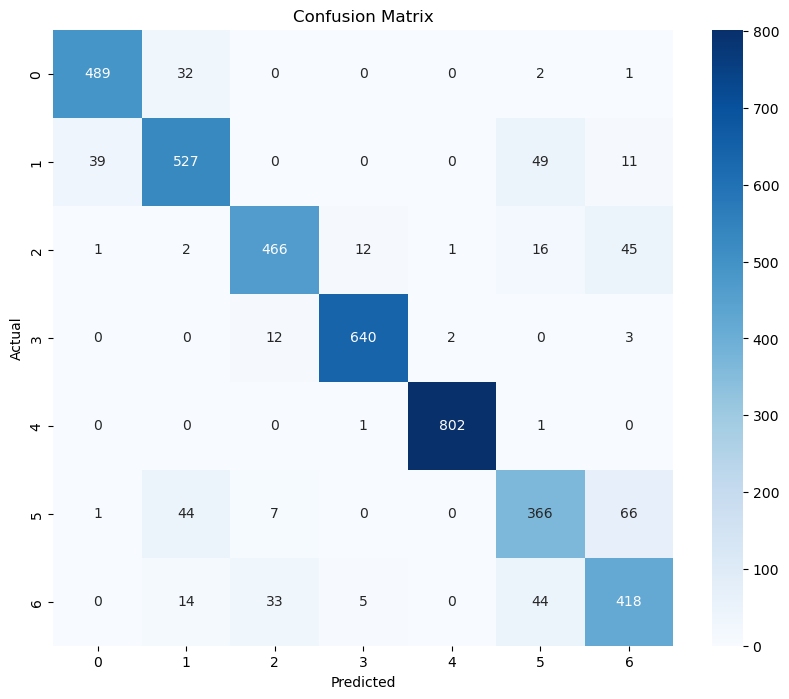

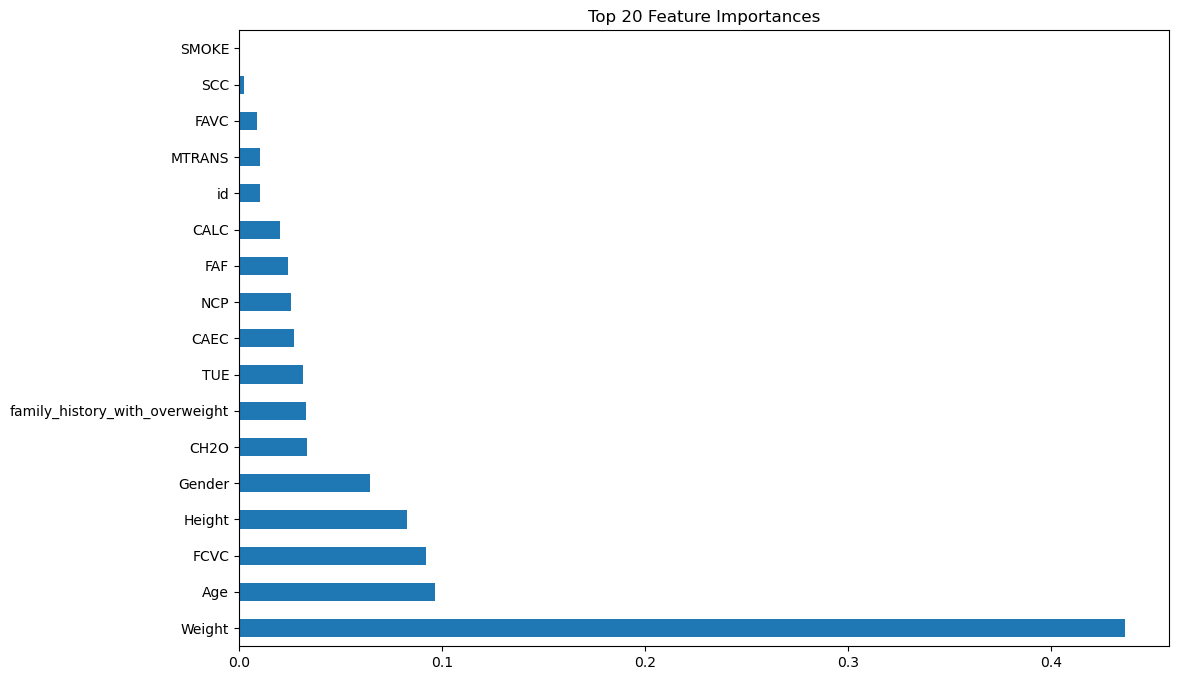


Test predictions saved to 'random_forest_submission.csv'
Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train = pd.read_csv('Otrain.csv')
test = pd.read_csv('Otest.csv')
sample_sub = pd.read_csv('Osample_submission.csv')

# Separate features and target
X = train.drop('NObeyesdad', axis=1)
y = train['NObeyesdad']

# Preprocessing: Convert categorical variables to numerical
ordinal_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X[column] = oe.fit_transform(X[[column]]).flatten()
    ordinal_encoders[column] = oe

# Encode target variable if categorical
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest classifier with balanced class weights
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',  # Handles class imbalance
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = rf_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig( 'Random Forest Confusion Matrix.png', dpi=300, bbox_inches = 'tight')
plt.show()

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(12,8))
feature_importances.nlargest(20).plot(kind='barh')
plt.title('Top 20 Feature Importances')
plt.savefig( 'Random Forest Feature Importance.png', dpi=300, bbox_inches = 'tight')
plt.show()

# Prepare test set predictions
if not test.empty:
    # Apply the same preprocessing to test data
    for column in test.select_dtypes(include=['object']).columns:
        if column in ordinal_encoders:
            test[column] = ordinal_encoders[column].transform(test[[column]]).flatten()
    
    # Make predictions
    test_pred = rf_model.predict(test)
    
    # If we encoded the target, inverse transform to get original labels
    if 'le_target' in locals():
        test_pred = le_target.inverse_transform(test_pred)
    
    # Create submission file
    submission = sample_sub.copy()
    submission['NObeyesdad'] = test_pred
    submission.to_csv('random_forest_submission.csv', index=False)
    print("\nTest predictions saved to 'random_forest_submission.csv'")

# Optional: Hyperparameter Tuning (uncomment to use)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")


# Interpretation of Random Forest Results
## 1. Overall Performance
The validation accuracy is 0.8931, meaning that the model correctly predicted approximately 89% of all cases during validation. This indicates strong performance and reliable predictions overall.That is  a strong result, especially since the model is working on a multi-class classification problem with 7 classes. This Random Forest model has 6% absolute improvement over the Decision Tree model.

## 2. Class Performance
Classification Metrics For each class (0-6):
### Precision indicates how many of the predicted labels for a class were actually correct. 
For example, class 4 had a precision of 1.00, meaning all predictions for this class were correct.
### Recall reflects how many of the actual labels were correctly predicted as belonging to a class.
Class 4 had a recall of 1.00, meaning no instances of class 4 were missed.
### F1-score is the harmonic mean of precision and recall, balancing both. 
Higher F1-scores reflect better performance and class 4 had perfect scores.
###  Support represents the number of instances in each class.
It shows the sample size for evaluation.

## 3 Class-by-Class Analysis
### Top Performers (F1 > 0.90)
1. Class 4. Perfect classification (1.00 across all metrics). Perfect classification due to possibly an easier or more distinct class.
2.  Class 3. Near-perfect (F1=0.97). The model is excellent on this class prediction.
3. Class 0. Excellent performance (F1=0.93). Very well classified. Strong precision and recall.
   
### Strong Performers (F1 0.85-0.90)
1. Class 1. Solid improvement (F1=0.85 vs 0.74 in Decision Tree). Slightly lower F1 but still has  good performance.
2. Class 2.  Good performance (F1=0.88). High precision; missed a few actual instances thus the recall is lower.

### Weaker Classes (F1 < 0.80)
1. Class 5. Remains challenging but improved (F1=0.76 vs 0.66 in Decision Tree). Lower performance the model struggles more here than in other classes.
2. Class 6: Moderate performance (F1=0.79). Similar to class 5, there is some confusion with other classes.

### Macro vs. Weighted Average
1. Macro average treats each class equally regardless of its sample size, providing an unbiased measure of overall performance. It's 0.88, which confirms fairly consistent performance across classes.
2. Weighted average accounts for the support (sample size) of each class, giving a composite score of 0.89 that closely mirrors the overall accuracy. Takes into account the number of samples in each class. Therefore,high-performing classes like class 4 have more influence

## 4. Overall Summary on performance
### Interpretation Summary
1. Overall, the model performs very well, especially with classes 0, 3, and 4.
2. Some difficulty with classes 5 and 6 might be due to class overlap or fewer distinguishing features.
3. Perfect score on class 4 suggests it might be highly separable in feature space.
   
### Interesting Observations
#### Consistent Strengths
1.  Classes 3 and 4 remain exceptionally well-predicted
2.  Class 0 maintains strong performance
### Class Imbalance Handling
1. The weighted avg (0.89) and approximately  macro avg (0.88) shows the Random Forest handles class imbalance better than a Decision Tree Model
2. Minority classes (5 and 6) show improved metrics
### Precision-Recall tradeoffs
1. Most classes now show better balance between precision and recall
2. No class has recall or precision below 0.76
   
## 5 Analysis of the Confusion Matrix as the next step
### Confusion Matrix Analysis
A confusion matrix tells me exactly how the random forest model is confusing different classes. Each row is the actual class, each column is the predicted class.
The most Ideal scenario is diagonal dominance (which is shown in results of the confusion matrix). Here is the breakdown:
#### Class 5 (Actual: 484)
Correctly predicted: 366
Mis-classified as class 1: 44
Mis-classified as class 6: 66.
This is the weakest performing class. The model often confuses class 5 with class 6 and class 1, possibly due to overlapping features.

#### Class 6 (Actual: 514)
Correctly predicted: 418
Mis-classified as class 2: 33
Class 6 also confused with class 1 and 5. This class has some spillover with 2 and 5, which aligns with the  lower precision and recall.

#### Class 2 (Actual: 543)
Good performance, but some instances  are predicted as:
Class 6 (45 times)
Class 3 (12 times)

#### Class 4 (Actual: 804)
Predicted correctly 802 times. This is extremely strong performance with only 2 errors.
   
## 6 Feature Importance
Random Forest provides feature importance scores, which help answer the following:
which features are the most predictive?
Which features are important features intuitive or surprising?
Which features are under-performing classes missing strong signals?
From the chart of feature importance it is observed that:
#### Top features are:
1, Weight which is by far the most dominant
2. Age, FCVC ( Fruits and vegetable), Height, and  Gender
This suggests the model leans heavily on physical attributes and eating habits. Specifically:
Weight contributes over 40% to the splits, and this can explain why it is good at classifying weight-related categories e.g., class 4.
While Gender, Age, FCVC (fruit/veg consumption) follow behind, it is important to note that  no single feature comes close to weight.

### Potential Issues
 Features like SCC, FAVC, MTRANS, id have almost no importance and  consideration on dropping them or checking for better encoding/cleaning should be carried out

## 7 Actionable Recommendations
1. For Class 5 & 6 confusion, I can try SMOTE or class_weight="balanced" to improve performance on underrepresented and overlapping classes.
2. Weight dominates too much I would consider feature scaling or feature engineering to reduce overfitting on one dominant feature.
3. Slight overfitting on big classes like class 4. Consider tuning hyperparameters like max_depth, min_samples_leaf, or try ExtraTrees or XGBoost for comparison.
4. Low-value features consider running a  recursive ,feature elimination (RFE) or permutation importance to validate usefulness of features like SCC, MTRANS, etc.

## 8 Conclusion:
This Random Forest model represents a significant improvement over the Decision Tree, particularly in handling previously problematic classes. 
The results suggest that the ensemble approach is successfully capturing more complex patterns in the obesity classification task.